In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
data = []
label = []

SIZE = 224 #Crop the image to 128x128

for folder in os.listdir('rice'):
    for file in os.listdir(os.path.join('rice', folder)):
        if file.endswith("jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join('rice', folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            data.append(im)
        else:
            continue

In [13]:
data_arr = np.array(data)
label_arr = np.array(label)

In [14]:
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,3)
X = data_arr/255

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [16]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [18]:
IMAGE_SIZE = [224, 224]

In [19]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [20]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [21]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [24]:
  # useful for getting number of output classes
folders = glob('train/*')

In [25]:
len(folders)

3

In [26]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [27]:
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [28]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [31]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

In [33]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=10
history = model.fit(
    datagen.flow(X_train,y_train, batch_size=batch_size),
    epochs = epochs,
    validation_data = (X_test,y_test),
    verbose = 1
)

Epoch 1/10
2/2 [==============================] - 14s 5s/step - loss: 1.6860 - accuracy: 0.1429 - val_loss: 1.4181 - val_accuracy: 0.3636
Epoch 2/10
2/2 [==============================] - 13s 5s/step - loss: 1.2885 - accuracy: 0.3571 - val_loss: 1.0800 - val_accuracy: 0.4545
Epoch 3/10
2/2 [==============================] - 11s 4s/step - loss: 1.0749 - accuracy: 0.4762 - val_loss: 0.9034 - val_accuracy: 0.7273
Epoch 4/10
2/2 [==============================] - 11s 8s/step - loss: 0.9995 - accuracy: 0.4762 - val_loss: 0.8717 - val_accuracy: 0.5455
Epoch 5/10
2/2 [==============================] - 12s 4s/step - loss: 0.9830 - accuracy: 0.4524 - val_loss: 0.8783 - val_accuracy: 0.5455
Epoch 6/10
2/2 [==============================] - 11s 4s/step - loss: 0.9907 - accuracy: 0.5000 - val_loss: 0.8669 - val_accuracy: 0.5455
Epoch 7/10
2/2 [==============================] - 11s 9s/step - loss: 0.9365 - accuracy: 0.5000 - val_loss: 0.8599 - val_accuracy: 0.7273
Epoch 8/10
2/2 [==================

KeyboardInterrupt: 

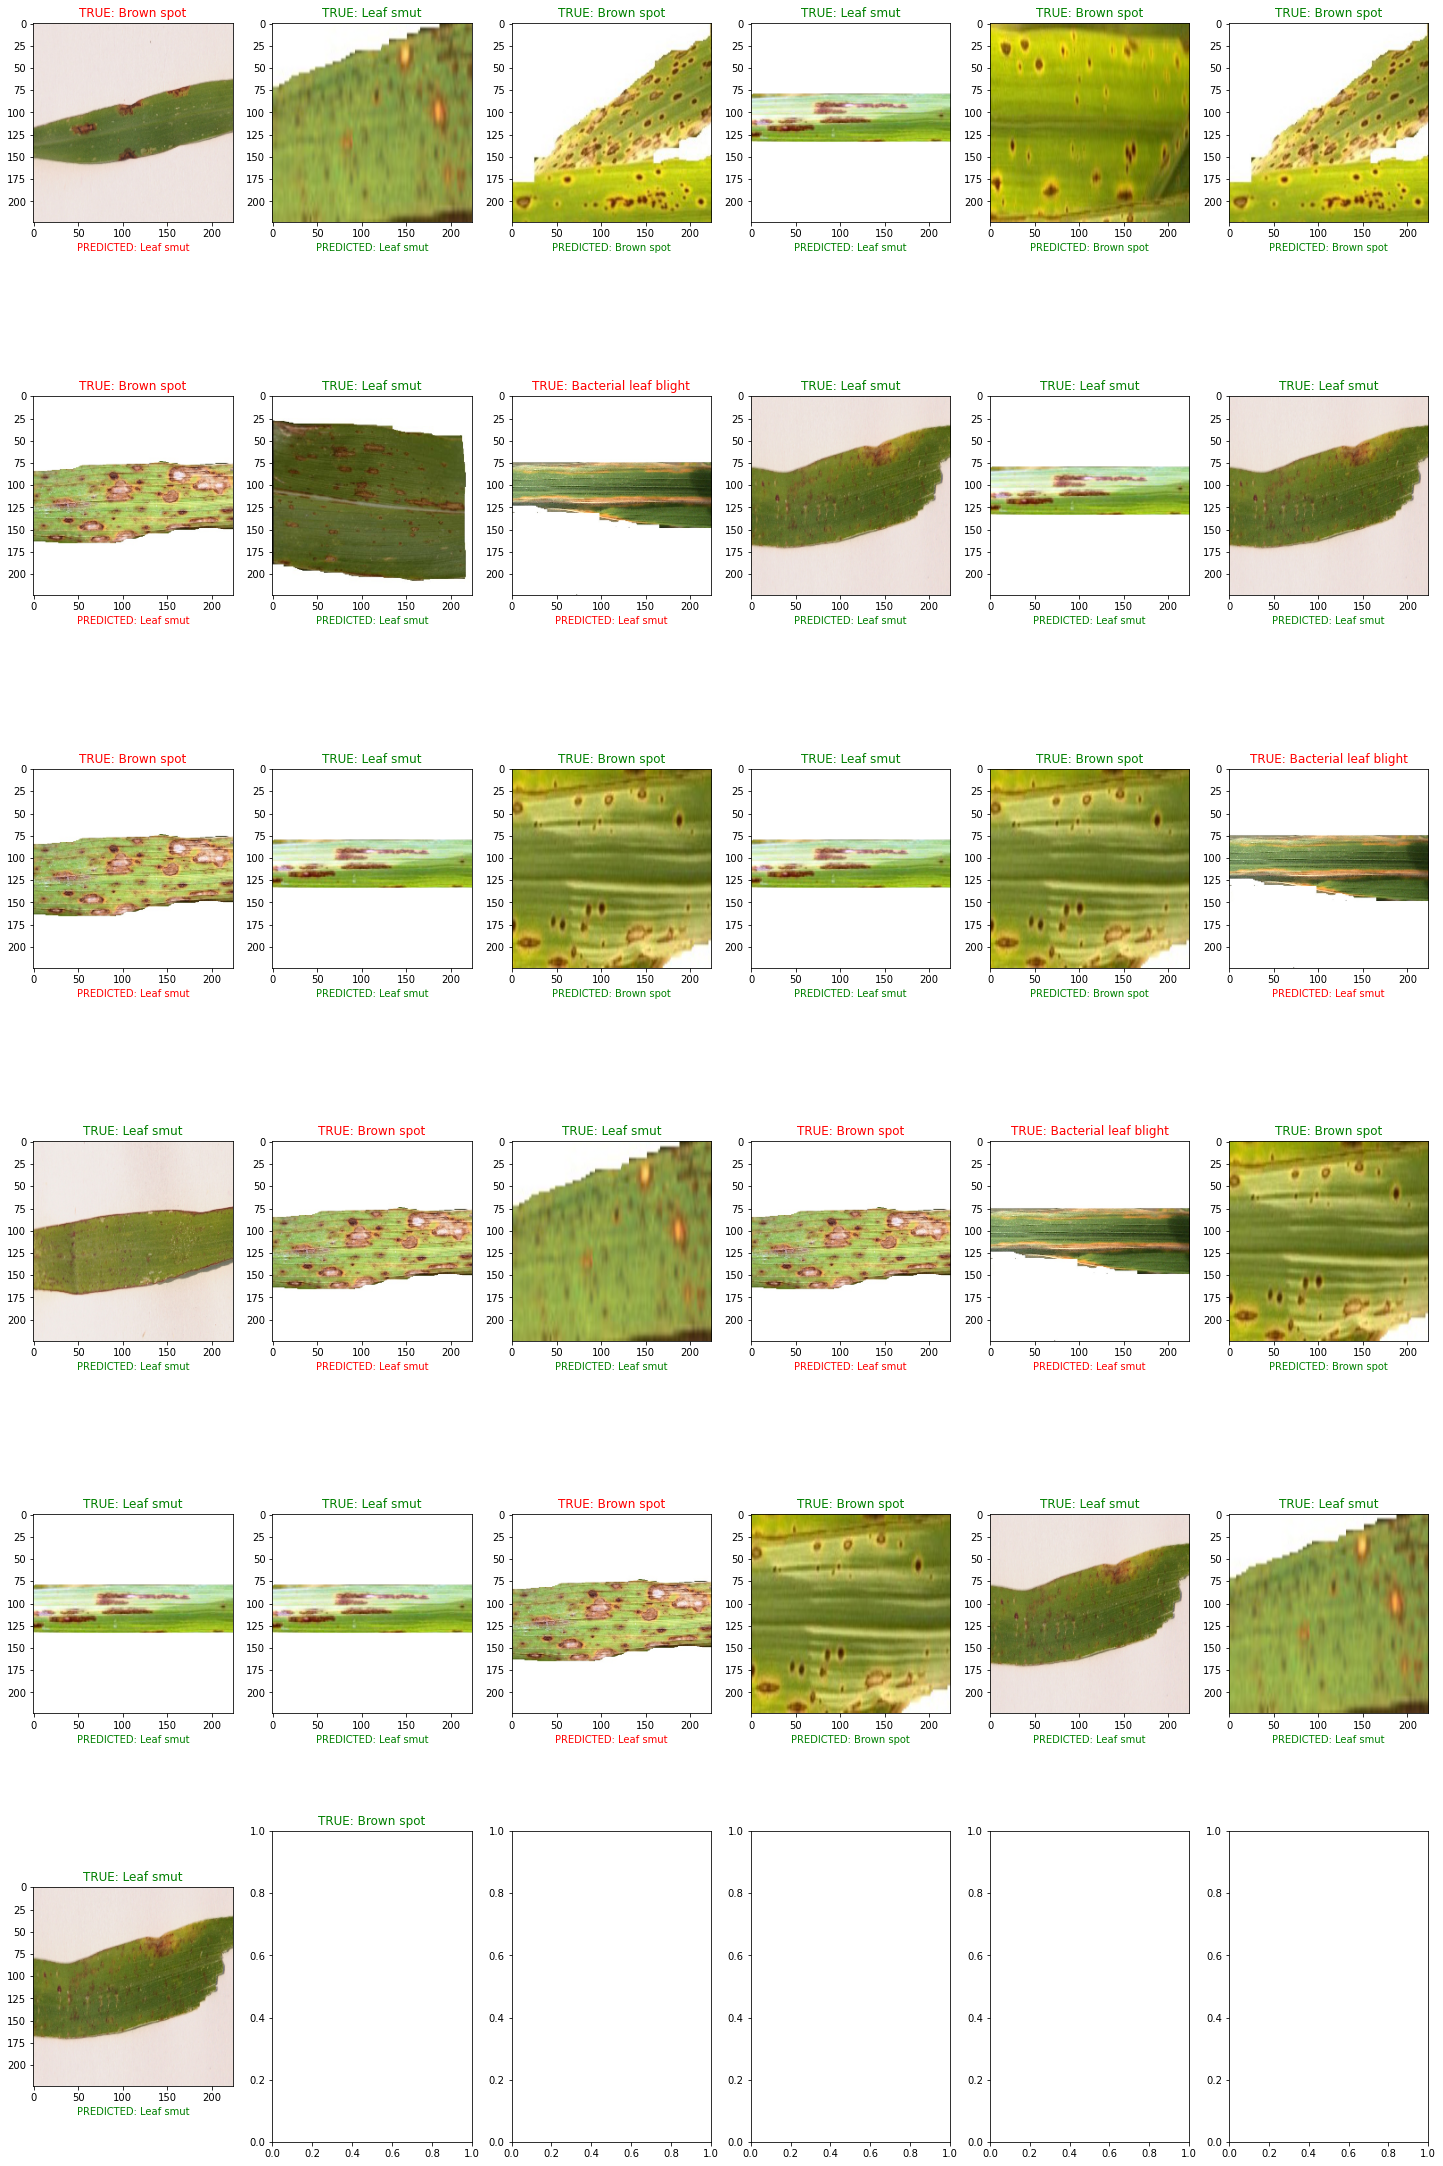

In [36]:
categories = np.sort(os.listdir('rice'))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')

In [ ]:
#Check results on a few select images according the test data.
from colorama import Fore, Back, Style

n=3
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = RF_model.predict(input_img_features)[0] 
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print(Fore.GREEN + "The actual label for this image is: ", test_labels[n])

if (prediction_RF == test_labels[n]):
    print(Fore.GREEN + "The prediction for this image is: ", prediction_RF)

    